## Regression

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
stats = pd.read_csv("data_clean.csv")

In [4]:
stats.head()

,link,name,country,country_link,age,overall_rating,potential,value,wage,likes,...,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,player_id,country_id,value_clean,wage_clean,Position
0,https://sofifa.com/player/229558/dayot-upameca...,Dayotchanculle Upamecano,France,/players?na=18,19,77,88,€13M,€18K,96,...,6,7,8,15,9,229558,18,13000000.0,18000.0,LCB
1,https://sofifa.com/player/230767/renato-junior...,Renato Júnior Luz Sanches,Portugal,/players?na=38,20,75,84,€10M,€41K,370,...,5,12,6,13,14,230767,38,10000000.0,41000.0,CM
2,https://sofifa.com/player/237221/juan-foyth/19...,Juan Marcos Foyth,Argentina,/players?na=52,20,74,85,€8.5M,€40K,44,...,8,15,7,14,9,237221,52,8500000.0,40000.0,CB
3,https://sofifa.com/player/228736/wuilker-farin...,Wuilker Faríñez,Venezuela,/players?na=61,20,73,87,€7.5M,€2K,110,...,73,70,69,74,77,228736,61,7500000.0,2000.0,GK
4,https://sofifa.com/player/189509/thiago-alcant...,Thiago Alcântara do Nascimento,Spain,/players?na=45,27,87,87,€51.5M,€140K,109,...,6,11,7,9,13,189509,45,51500000.0,140000.0,CM


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13758 entries, 0 to 13757
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              13758 non-null  object 
 1   name              13758 non-null  object 
 2   country           13758 non-null  object 
 3   country_link      13758 non-null  object 
 4   age               13758 non-null  int64  
 5   overall_rating    13758 non-null  int64  
 6   potential         13758 non-null  int64  
 7   value             13758 non-null  object 
 8   wage              13758 non-null  object 
 9   likes             13758 non-null  int64  
 10  dislikes          13758 non-null  int64  
 11  followers         13758 non-null  int64  
 12  Crossing          13758 non-null  int64  
 13  Finishing         13758 non-null  int64  
 14  Heading Accuracy  13758 non-null  int64  
 15  Short Passing     13758 non-null  int64  
 16  Volleys           13758 non-null  int64 

In [6]:
#gereksiz bilgileri veri setinden silme
stats = stats.drop(["link","name","country","country_link","value","wage","likes","dislikes","followers","player_id","country_id"],axis=1)

In [7]:
stats

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
0,19,77,88,47,39,71,72,21,59,32,...,84,75,6,7,8,15,9,13000000.0,18000.0,LCB
1,20,75,84,60,65,64,76,68,77,59,...,70,64,5,12,6,13,14,10000000.0,41000.0,CM
2,20,74,85,41,43,74,73,43,68,41,...,76,72,8,15,7,14,9,8500000.0,40000.0,CB
3,20,73,87,18,19,17,25,15,14,22,...,16,21,73,70,69,74,77,7500000.0,2000.0,GK
4,27,87,87,72,69,54,90,90,90,85,...,67,71,6,11,7,9,13,51500000.0,140000.0,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13753,25,62,62,51,63,56,52,66,61,49,...,36,28,13,13,14,14,12,325000.0,1000.0,RM
13754,27,66,67,56,18,70,67,15,51,52,...,64,61,6,13,11,14,10,600000.0,3000.0,RCB
13755,29,68,68,58,29,65,61,39,47,50,...,64,65,8,9,8,11,8,700000.0,3000.0,CB
13756,26,66,66,63,61,51,61,62,72,56,...,27,25,10,10,10,8,8,700000.0,2000.0,LM


In [8]:
#kategorik değişkeni,sayısal değişken yapma / çok sınıflı dönüşüm
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [9]:
stats['Position'] = stats['Position'].astype('str')

In [10]:
stats["Position"] = lbe.fit_transform(stats["Position"])

In [11]:
stats.head()

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
0,19,77,88,47,39,71,72,21,59,32,...,84,75,6,7,8,15,9,13000000.0,18000.0,8
1,20,75,84,60,65,64,76,68,77,59,...,70,64,5,12,6,13,14,10000000.0,41000.0,4
2,20,74,85,41,43,74,73,43,68,41,...,76,72,8,15,7,14,9,8500000.0,40000.0,1
3,20,73,87,18,19,17,25,15,14,22,...,16,21,73,70,69,74,77,7500000.0,2000.0,5
4,27,87,87,72,69,54,90,90,90,85,...,67,71,6,11,7,9,13,51500000.0,140000.0,4


In [12]:
stats.describe()

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
count,13758.000000,13758.000000,13758.000000,13758.000000,13758.000000,13758.000000,13758.00000,13758.000000,13758.000000,13758.000000,...,13758.000000,13758.000000,13758.000000,13758.000000,13758.000000,13758.000000,13758.000000,1.375800e+04,13758.000000,13758.00000
mean,24.802951,67.772060,72.641736,51.666376,47.552188,53.721980,60.60125,44.813272,57.660343,49.414304,...,48.737753,46.515627,16.257523,16.039541,15.887266,16.085405,16.339730,3.155406e+06,12151.314595,11.69763
std,4.517843,6.725034,6.035821,18.305495,19.563786,17.270443,14.26085,17.881840,18.593676,18.526443,...,21.851820,21.569739,17.579222,16.762707,16.351868,16.969712,17.879968,6.360112e+06,24371.218714,8.81902
min,16.000000,46.000000,46.000000,6.000000,2.000000,4.000000,7.00000,4.000000,4.000000,6.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+04,1000.000000,0.00000
25%,21.000000,63.000000,69.000000,40.000000,32.000000,46.000000,56.00000,32.000000,52.000000,37.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.750000e+05,2000.000000,4.00000
50%,24.000000,68.000000,72.000000,56.000000,52.000000,57.000000,64.00000,46.000000,63.000000,52.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,9.500000e+05,4000.000000,9.00000
75%,28.000000,72.000000,76.000000,65.000000,63.000000,65.000000,70.00000,59.000000,70.000000,64.000000,...,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.200000e+06,13000.000000,19.00000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.00000,90.000000,97.000000,94.000000,...,93.000000,90.000000,90.000000,92.000000,92.000000,91.000000,93.000000,1.105000e+08,565000.000000,27.00000


In [13]:
df = stats.copy()
df.isna().sum()

age                 0
overall_rating      0
potential           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
value_clean         0
wage_clean          0
Position            0
dtype: int64

In [14]:
#aykırı değer yakalama
from sklearn.neighbors import LocalOutlierFactor

In [15]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [16]:
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
df_scores = clf.negative_outlier_factor_

In [18]:
np.sort(df_scores)[0:20]

array([-155.02141627, -154.89230092, -152.02418237, -138.69118866,
       -137.19851522,  -94.11734536,  -92.10552348,  -91.15886341,
        -90.84318375,  -75.2180578 ,  -73.2930637 ,  -70.19780301,
        -62.26767127,  -61.85580327,  -61.79944747,  -60.94990171,
        -60.42817482,  -59.49819612,  -56.96730946,  -56.85167795])

In [19]:
len(df_scores)

13758

In [20]:
esik_deger = np.sort(df_scores)[1000]

In [21]:
aykiri_tf = df_scores > esik_deger

In [22]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
#aykırı değerleri veri setinden silme
yeni_df  = df[df_scores > esik_deger]

In [24]:
yeni_df

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
0,19,77,88,47,39,71,72,21,59,32,...,84,75,6,7,8,15,9,13000000.0,18000.0,8
1,20,75,84,60,65,64,76,68,77,59,...,70,64,5,12,6,13,14,10000000.0,41000.0,4
2,20,74,85,41,43,74,73,43,68,41,...,76,72,8,15,7,14,9,8500000.0,40000.0,1
3,20,73,87,18,19,17,25,15,14,22,...,16,21,73,70,69,74,77,7500000.0,2000.0,5
4,27,87,87,72,69,54,90,90,90,85,...,67,71,6,11,7,9,13,51500000.0,140000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13753,25,62,62,51,63,56,52,66,61,49,...,36,28,13,13,14,14,12,325000.0,1000.0,22
13754,27,66,67,56,18,70,67,15,51,52,...,64,61,6,13,11,14,10,600000.0,3000.0,18
13755,29,68,68,58,29,65,61,39,47,50,...,64,65,8,9,8,11,8,700000.0,3000.0,1
13756,26,66,66,63,61,51,61,62,72,56,...,27,25,10,10,10,8,8,700000.0,2000.0,12


In [25]:
#silinen değerler
df[df_scores < esik_deger]

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
13,20,70,84,65,70,43,69,51,74,56,...,41,37,11,6,13,11,8,1.849073e+06,9103.854390,0
19,18,67,82,48,33,52,69,33,56,59,...,64,57,11,8,12,9,15,1.400000e+06,1000.000000,2
88,32,81,81,86,62,66,84,76,76,81,...,80,79,1,1,1,1,1,1.350000e+07,120000.000000,4
90,33,76,76,44,79,90,73,81,67,57,...,25,15,2,2,3,4,2,4.800000e+06,76000.000000,26
104,18,66,82,54,55,34,68,48,68,58,...,45,41,12,11,8,12,6,1.300000e+06,7000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,26,62,63,62,52,55,65,49,66,41,...,55,49,15,8,11,7,8,3.500000e+05,7000.000000,4
13727,26,68,71,37,24,70,58,34,55,28,...,70,64,8,16,14,8,15,9.250000e+05,5000.000000,1
13746,23,55,60,34,57,57,45,46,49,37,...,18,12,10,10,15,15,8,1.200000e+05,2000.000000,26
13748,28,66,66,64,25,63,62,30,57,35,...,65,66,9,6,12,7,13,7.413704e+05,3717.492984,18


In [26]:
yeni_df.describe()

,age,overall_rating,potential,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,value_clean,wage_clean,Position
count,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,...,12757.000000,12757.000000,12757.00000,12757.000000,12757.000000,12757.000000,12757.000000,1.275700e+04,12757.000000,12757.000000
mean,24.660814,67.989026,72.921376,51.919260,47.817826,53.871522,60.902563,45.028063,58.008858,49.709414,...,48.856001,46.600690,16.16101,15.939171,15.791409,15.976483,16.231873,3.291140e+06,12139.747564,11.707141
std,4.387092,6.676027,5.931313,18.280408,19.568957,17.212396,14.165708,17.891970,18.542350,18.510698,...,21.846539,21.568341,17.47438,16.654041,16.265808,16.845081,17.774016,6.419010e+06,24067.989512,8.803212
min,16.000000,47.000000,48.000000,6.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,2.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000e+04,1000.000000,0.000000
25%,21.000000,64.000000,69.000000,41.000000,32.000000,46.000000,56.000000,32.000000,53.000000,37.000000,...,28.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000e+05,2000.000000,4.000000
50%,24.000000,68.000000,73.000000,57.000000,52.000000,57.000000,64.000000,47.000000,63.000000,52.000000,...,56.000000,53.000000,11.00000,11.000000,11.000000,11.000000,11.000000,1.000000e+06,4000.000000,9.000000
75%,28.000000,72.000000,77.000000,66.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,...,67.000000,65.000000,14.00000,14.000000,14.000000,14.000000,14.000000,3.300000e+06,13000.000000,19.000000
max,40.000000,94.000000,95.000000,93.000000,94.000000,94.000000,93.000000,90.000000,95.000000,94.000000,...,93.000000,90.000000,90.00000,92.000000,92.000000,90.000000,93.000000,9.650000e+07,455000.000000,27.000000


In [27]:
dms = pd.get_dummies(yeni_df['Position'])
y = yeni_df["wage_clean"] #bağımlı değişken
X_ = yeni_df.drop(['wage_clean', 'Position'], axis=1).astype('float64') #bağımsız değişkenin çıkarılması
X = pd.concat([X_, dms], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=42)

## Wage pred.

In [28]:
!pip install xgboost

In [29]:
import xgboost

In [30]:
from xgboost import XGBRegressor

In [31]:
xgb = XGBRegressor().fit(X_train,y_train)

In [32]:
xgb_params = {"learning_rate": [0.1,0.01,0.03],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [50,100,250,500],
             "colsample_bytree": [0.4,0.7,1]}

In [32]:
xgb_cv_model = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 21.0min finished


In [33]:
xgb_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100}

In [34]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 100).fit(X_train, y_train)

In [35]:
y_pred = xgb_tuned.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

11802.451575348425

## KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn_params = {"n_neighbors" : np.arange(1,20,1)}

In [39]:
knn = KNeighborsRegressor()

In [36]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [37]:
knn_cv_model.best_params_

{'n_neighbors': 19}

In [38]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [39]:
knn_pred = knn_tuned.predict(X_test)

In [40]:
knn_result = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
knn_result

12152.338982582922

## Yapay Sinir Ağları

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
scaler = StandardScaler() #homojen veri seti için

In [34]:
X_train_scaled =scaler.fit(X_train).transform(X_train)

In [35]:
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [36]:
nn_model = MLPRegressor().fit(X_train_scaled, y_train)

In [37]:
nn_model

MLPRegressor()

In [38]:
y_pred = nn_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

15202.277458230912

## Classification and Regression Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
cart_model = DecisionTreeRegressor()

In [41]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]} 
                

In [43]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 5).fit(X_train, y_train)

In [44]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [45]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [46]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13221.497560381782

## Random Forests

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

In [49]:
rf_params = {"max_depth": [5,8,10],
             #her ağacın derinlikleri
            "max_features": [2,5,10],
             #random seçilecek olan feature sayısı
            "n_estimators": [200, 500, 1000, 2000],
             #en ideal sayılar 500,2000
             #problemden probleme değişebilir
            "min_samples_split": [2,10,80,100]}

In [50]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 16.5min finished


In [51]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [52]:
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 10,
                                max_features = 10,
                                min_samples_split = 2,
                                 n_estimators = 2000)
rf_tuned = rf_model.fit(X_train, y_train)

In [53]:
rf_tuned

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=2000,
                      random_state=42)

In [54]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

12251.834909930494

In [55]:
rf_tuned.feature_importances_*100

array([1.26672571e+00, 2.00642645e+01, 5.44318193e+00, 8.53480279e-01,
       1.40571513e+00, 8.13016034e-01, 4.13008370e+00, 1.26589381e+00,
       2.23923618e+00, 6.73450101e-01, 5.44519683e-01, 9.22125628e-01,
       6.04150556e+00, 4.47311899e-01, 4.80864119e-01, 5.34210182e-01,
       9.75940438e+00, 5.29458512e-01, 1.05698554e+00, 6.45526818e-01,
       5.40105660e-01, 4.86746607e-01, 9.87263439e-01, 7.40966542e-01,
       1.53472942e+00, 2.62310885e+00, 1.63121430e+00, 6.68941593e-01,
       4.41982268e+00, 1.17043347e+00, 1.89193742e+00, 1.55588413e+00,
       6.71885702e-01, 7.73692320e-01, 5.47605202e-01, 8.71221904e-01,
       7.11122017e-01, 1.84176308e+01, 3.60488186e-02, 2.38826991e-02,
       1.87879289e-02, 1.50124929e-03, 4.95413422e-02, 2.43189681e-03,
       4.98570396e-03, 3.30782507e-02, 1.06738943e-02, 2.16645305e-02,
       1.69734730e-02, 2.04561394e-02, 1.63483935e-02, 7.12384186e-03,
       2.89829081e-02, 5.90333571e-04, 9.36884446e-03, 3.08501252e-02,
      

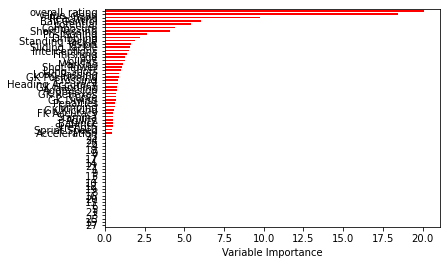

In [56]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Gradient Boosting Machines

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [59]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
              #ağaçların katkısı
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
              #kullanılacak olan ağaç sayısı
             "subsample": [1,0.5,0.8],
              #ağaçların oluşturma değeri
               #1 hepsini ifade eder
             "loss": ["ls","lad","quantile"]}
            #kayıp fonksiyonları
            

In [61]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 2, #uzun sürmemesi için,cv=10
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 13.2min finished


In [67]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.8}

In [68]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "lad",
                                     max_depth = 5,
                                     n_estimators = 500,
                                     subsample = 0.8).fit(X_train, y_train)

In [69]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

12254.972645899

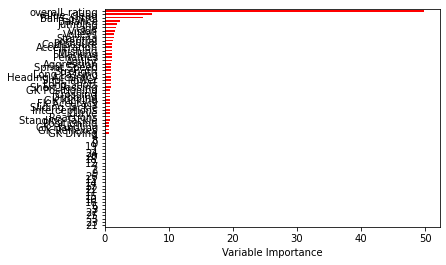

In [70]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## LightGBM

In [71]:
!pip install lightgbm

In [72]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\furka\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    lightgbm-3.1.1             |   py38h885f38d_0         754 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.1.1-py38h885f38d_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-

In [74]:
from lightgbm import LGBMRegressor

In [75]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [76]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [77]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 5, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.5min finished


In [78]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

In [79]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 3, 
                          n_estimators = 40).fit(X_train, y_train)

In [80]:
y_pred = lgbm_tuned.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

12168.849834958244

In [85]:
## CatBoost

In [82]:
!pip install catboost

  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)


In [86]:
from catboost import CatBoostRegressor

In [87]:
catb_model = CatBoostRegressor()

In [88]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [89]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


0:	learn: 24057.7403370	total: 57.5ms	remaining: 28.7s
1:	learn: 23902.7164046	total: 62.7ms	remaining: 15.6s
2:	learn: 23739.4284194	total: 71.1ms	remaining: 11.8s
3:	learn: 23583.6706760	total: 74.6ms	remaining: 9.25s
4:	learn: 23430.3467885	total: 78.1ms	remaining: 7.74s
5:	learn: 23273.9454933	total: 81.5ms	remaining: 6.71s
6:	learn: 23128.4313797	total: 85.2ms	remaining: 6s
7:	learn: 22981.2422856	total: 89.9ms	remaining: 5.53s
8:	learn: 22834.5938125	total: 96.6ms	remaining: 5.27s
9:	learn: 22685.2370265	total: 100ms	remaining: 4.91s
10:	learn: 22545.8774355	total: 104ms	remaining: 4.61s
11:	learn: 22401.2745350	total: 107ms	remaining: 4.36s
12:	learn: 22255.3600963	total: 114ms	remaining: 4.25s
13:	learn: 22112.8907573	total: 127ms	remaining: 4.41s
14:	learn: 21982.1048544	total: 135ms	remaining: 4.38s
15:	learn: 21845.8975567	total: 139ms	remaining: 4.21s
16:	learn: 21706.5931087	total: 148ms	remaining: 4.19s
17:	learn: 21576.0221981	total: 151ms	remaining: 4.05s
18:	learn: 214

In [90]:
catb_cv_model.best_params_

{'depth': 6, 'iterations': 500, 'learning_rate': 0.01}

In [91]:
catb_tuned = CatBoostRegressor(depth = 6, iterations = 500, learning_rate = 0.01).fit(X_train, y_train)

0:	learn: 24057.7403370	total: 4.85ms	remaining: 2.42s
1:	learn: 23902.7164046	total: 8.12ms	remaining: 2.02s
2:	learn: 23739.4284194	total: 11.2ms	remaining: 1.86s
3:	learn: 23583.6706760	total: 14.4ms	remaining: 1.78s
4:	learn: 23430.3467885	total: 17.6ms	remaining: 1.74s
5:	learn: 23273.9454933	total: 20.9ms	remaining: 1.72s
6:	learn: 23128.4313797	total: 24.2ms	remaining: 1.71s
7:	learn: 22981.2422856	total: 27.2ms	remaining: 1.68s
8:	learn: 22834.5938125	total: 30.6ms	remaining: 1.67s
9:	learn: 22685.2370265	total: 33.8ms	remaining: 1.66s
10:	learn: 22545.8774355	total: 37.1ms	remaining: 1.65s
11:	learn: 22401.2745350	total: 40.3ms	remaining: 1.64s
12:	learn: 22255.3600963	total: 43.5ms	remaining: 1.63s
13:	learn: 22112.8907573	total: 46.4ms	remaining: 1.61s
14:	learn: 21982.1048544	total: 49.6ms	remaining: 1.6s
15:	learn: 21845.8975567	total: 52.6ms	remaining: 1.59s
16:	learn: 21706.5931087	total: 55.8ms	remaining: 1.58s
17:	learn: 21576.0221981	total: 59.2ms	remaining: 1.58s
18:

In [92]:
y_pred = catb_tuned.predict(X_test)

In [93]:
y_pred = catb_tuned.predict(X_test)
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

11911.828394562133